In [11]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [12]:
def linear(x,m,b):
    return m*x+b

In [26]:
xls = pd.ExcelFile('Basic_linear_data.xlsx')
sheet1 = pd.read_excel(xls, sheet_name=xls.sheet_names[0])
sheet2 = pd.read_excel(xls, sheet_name=xls.sheet_names[1])
sheet3 = pd.read_excel(xls, sheet_name=xls.sheet_names[2])
sheet4 = pd.read_excel(xls, sheet_name=xls.sheet_names[3])

z1=sheet1.loc[:,"z"]

c1=sheet1.loc[:,"c"]
c1err=sheet1.loc[:,"d"]

fit1,fit1cov=optimize.curve_fit(linear, z1, c1, sigma=c1err)
print("z1[0]",list(z1)[-1])
fit1_input=np.linspace(z1[0],list(z1)[-1],100)
fit1_output=fit1_input*fit1[0]+fit1[1]
print("fit1",fit1)
print("fit1cov",fit1cov)




z1[0] 10.832475762335482
fit1 [ 0.13513373 -1.20868248]
fit1cov [[ 0.00159209 -0.01173984]
 [-0.01173984  0.08780545]]


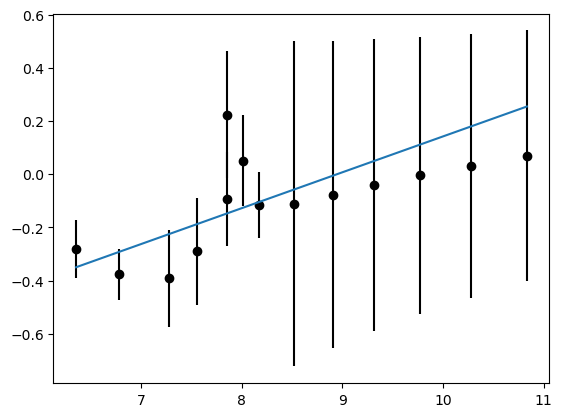

In [ ]:
fig1,ax1=plt.subplots()
ax1.scatter(z1,c1,color='black')
ax1.errorbar(z1,c1,yerr=c1err,color='black',linestyle='none')
ax1.plot(fit1_input,fit1_output,color='black')
ax1.fill_between(fit1_input,fit1_output+fit1_output_sigma,fit1_output-fit1_output_sigma)